In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor


In [75]:
file_path = '/content/drive/MyDrive/AIAssingment/EarthQuake.csv'
df = pd.read_csv(file_path)

# EDA

In [76]:
from tabulate import tabulate

print("Datas are shown below:")
print(tabulate(df.head(5), headers="keys", tablefmt="fancy_grid", showindex=False))

Datas are shown below:
╒══════════════════════════════════════════╤═════════════╤══════════════════╤═══════╤═══════╤═════════╤═══════════╤═══════╤═══════╤═══════╤══════════╤═══════╤═══════════╤═════════╤════════════╤═════════════╤═══════════════════════╤═══════════════╤═══════════╕
│ Heading                                  │   magnitude │ date_time        │   cdi │   mmi │ alert   │   tsunami │   sig │ net   │   nst │     dmin │   gap │ magType   │   depth │   latitude │   longitude │ location              │ continent     │ country   │
╞══════════════════════════════════════════╪═════════════╪══════════════════╪═══════╪═══════╪═════════╪═══════════╪═══════╪═══════╪═══════╪══════════╪═══════╪═══════════╪═════════╪════════════╪═════════════╪═══════════════════════╪═══════════════╪═══════════╡
│ M 6.5 - 42 km W of Sola, Vanuatu         │         6.5 │ 16-08-2023 12:47 │     7 │     4 │ green   │         0 │   657 │ us    │   114 │ 7.177    │  25   │ mww       │ 192.955 │   -13.8814 │    

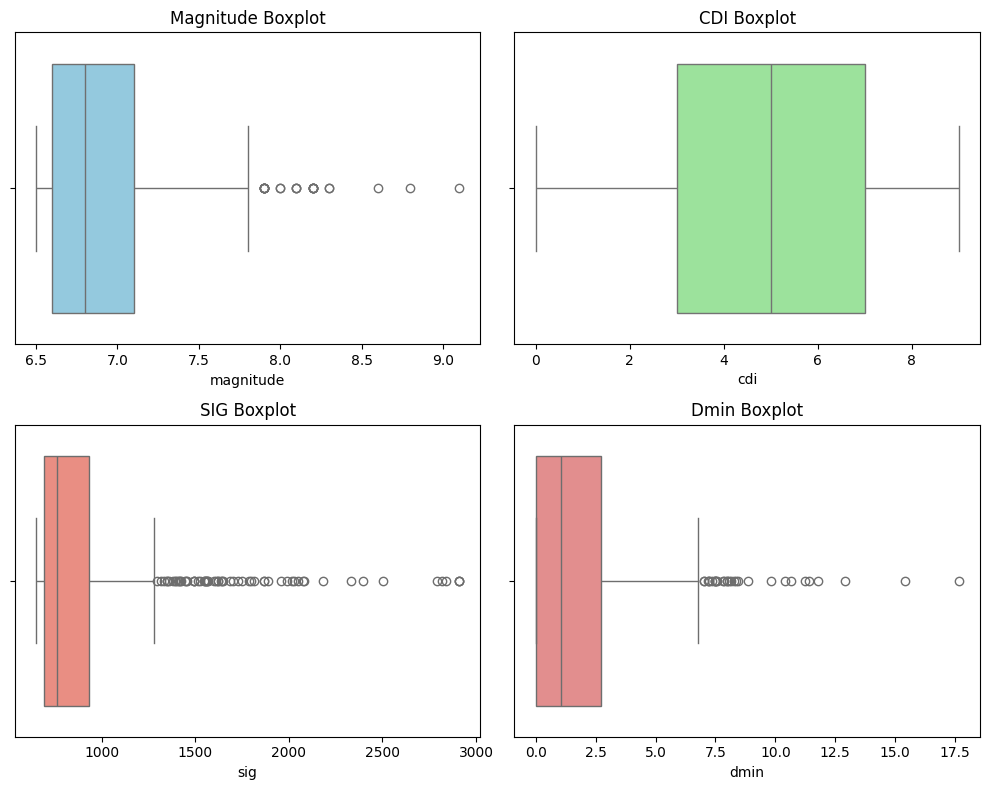

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(ax=axes[0, 0], data=df, x='magnitude', color='skyblue')
axes[0, 0].set_title('Magnitude Boxplot')

sns.boxplot(ax=axes[0, 1], data=df, x='cdi', color='lightgreen')
axes[0, 1].set_title('CDI Boxplot')

sns.boxplot(ax=axes[1, 0], data=df, x='sig', color='salmon')
axes[1, 0].set_title('SIG Boxplot')

sns.boxplot(ax=axes[1, 1], data=df, x='dmin', color='lightcoral')
axes[1, 1].set_title('Dmin Boxplot')

plt.tight_layout()
plt.show()

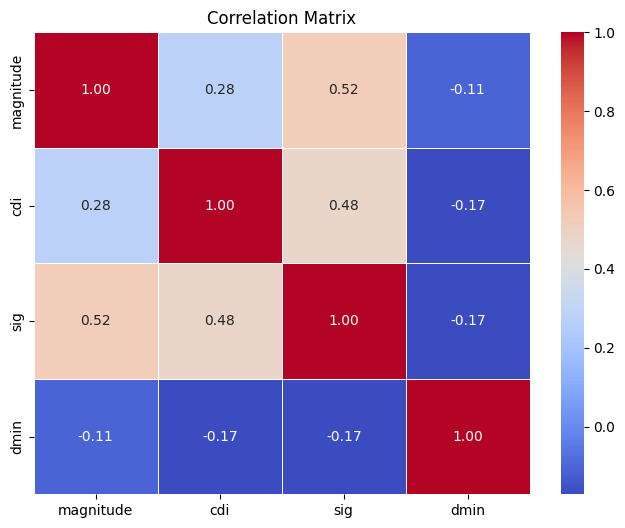

In [78]:
corr_matrix = df[['magnitude', 'cdi', 'sig', 'dmin']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


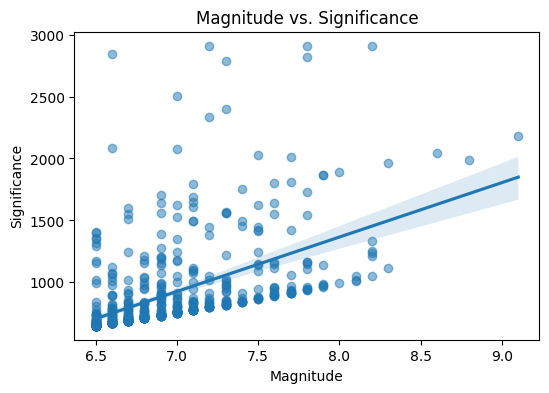

In [79]:
plt.figure(figsize=(6, 4))
sns.regplot(x=df["magnitude"], y=df["sig"], scatter_kws={"alpha": 0.5})
plt.xlabel("Magnitude")
plt.ylabel("Significance")
plt.title("Magnitude vs. Significance")
plt.show()

# Build a Model from Scratch

In [80]:
X = df[["depth", "sig", "dmin", "gap"]].fillna(df[["depth", "sig", "dmin", "gap"]].mean())
y = df["magnitude"].fillna(df["magnitude"].mean())
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.mean())
y = y.replace([np.inf, -np.inf], np.nan).fillna(y.mean())

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

Optimal theta values: [ 6.93355263  0.02590028  0.17821143 -0.01218701 -0.0451731 ]


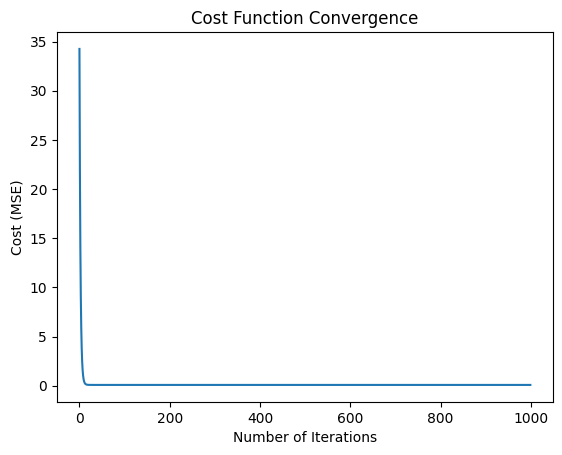

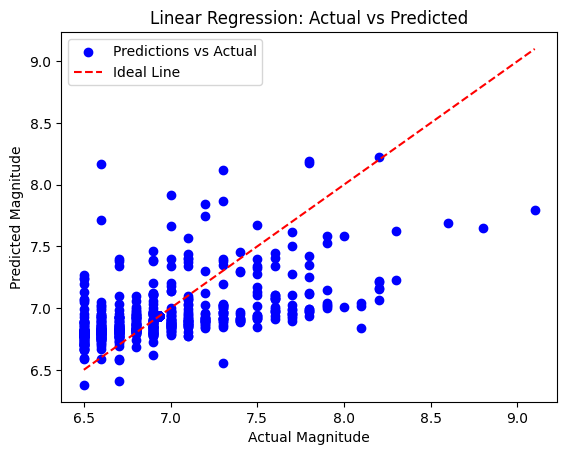

In [81]:
def gradient_descent(X, y, theta, learning_rate=0.1, iterations=1000):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients

        cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)
        cost_history.append(cost)

    return theta, cost_history

theta_initial = np.random.randn(X_b.shape[1], 1)

theta_optimal, cost_history = gradient_descent(X_b, y.values.reshape(-1, 1), theta_initial, learning_rate=0.1, iterations=1000)

print(f"Optimal theta values: {theta_optimal.ravel()}")

import matplotlib.pyplot as plt
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.show()

def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(theta)

y_pred = predict(X_scaled, theta_optimal)

plt.scatter(y, y_pred, color='blue', label="Predictions vs Actual")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label="Ideal Line")
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred_linear = linear_model.predict(X_test_scaled)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error for Linear Regression: {mse_linear}")
print(f"Mean Squared Error for Random Forest Regression: {mse_rf}")
print(f"R² for Linear Regression: {r2_linear}")
print(f"R² for Random Forest Regression: {r2_rf}")

if r2_linear > r2_rf:
    print("Linear Regression performed better based on R².")
else:
    print("Random Forest Regression performed better based on R².")

Mean Squared Error for Linear Regression: 0.08663421562290434
Mean Squared Error for Random Forest Regression: 0.055327501098078304
R² for Linear Regression: 0.02123702702273389
R² for Random Forest Regression: 0.37492930393841717
Random Forest Regression performed better based on R².


# Hyper-parameter optimization

In [88]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(X_train_scaled, y_train)

best_params_ridge = grid_search_ridge.best_params_
best_ridge_model = grid_search_ridge.best_estimator_

y_pred_ridge = best_ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Best Hyperparameters for Ridge Regression: {best_params_ridge}")
print(f"Mean Squared Error for Ridge Regression: {mse_ridge}")
print(f"R² for Ridge Regression: {r2_ridge}")

rf_model = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [5, 10, 15, None],  # Depth of each tree
    'min_samples_split': [2, 10, 20],  # Minimum samples to split
    'min_samples_leaf': [1, 5, 10]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Best Hyperparameters for Random Forest Regression: {best_params_rf}")
print(f"Mean Squared Error for Random Forest Regression: {mse_rf}")
print(f"R² for Random Forest Regression: {r2_rf}")


Best Hyperparameters for Ridge Regression: {'alpha': 1}
Mean Squared Error for Ridge Regression: 0.08658507010351187
R² for Ridge Regression: 0.02179225585839928
Best Hyperparameters for Random Forest Regression: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error for Random Forest Regression: 0.054155115451789373
R² for Random Forest Regression: 0.3881745056452386


# Feature Selection

In [90]:
np.random.seed(42)
X = pd.DataFrame(np.random.rand(100, 5), columns=[f'Feature_{i}' for i in range(5)])
y = X['Feature_0'] * 2 + X['Feature_1'] * 3 + np.random.rand(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mi_scores = mutual_info_regression(X_train_scaled, y_train)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
top_features = mi_scores.head(3).index.tolist()

print("\nTop Selected Features:", top_features)

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]
        self.theta = np.random.randn(n + 1, 1)
        y = y.reshape(-1, 1)

        for i in range(self.iterations):
            predictions = X_b.dot(self.theta)
            errors = predictions - y
            gradients = (2/m) * X_b.T.dot(errors)

            if np.isnan(gradients).any():
                print(f"NaN detected in iteration {i}, stopping training.")
                break

            self.theta -= self.learning_rate * gradients

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta).flatten()

model1 = LinearRegressionScratch()
model1.fit(X_train_selected.values, y_train.values)
y_pred1 = model1.predict(X_test_selected.values)

mae1 = mean_absolute_error(y_test, y_pred1)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
r2_1 = r2_score(y_test, y_pred1)

print("\nModel 1 (Scratch) Performance with Selected Features:")
print(f"MAE: {mae1:.4f}, RMSE: {rmse1:.4f}, R²: {r2_1:.4f}")

X_train_selected2 = X_train[top_features]
X_test_selected2 = X_test[top_features]

model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train_selected2, y_train)
y_pred2 = model2.predict(X_test_selected2)

mae2 = mean_absolute_error(y_test, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
r2_2 = r2_score(y_test, y_pred2)

print("\nModel 2 (Random Forest) Performance with Selected Features:")
print(f"MAE: {mae2:.4f}, RMSE: {rmse2:.4f}, R²: {r2_2:.4f}")

print("\nBest subset of features for Model 1 (Scratch):", top_features)
print("Best subset of features for Model 2 (Random Forest):", top_features)

if r2_1 > r2_2:
    print("\nLinear Regression (Scratch) performed better based on R².")
else:
    print("\nRandom Forest performed better based on R².")



Top Selected Features: ['Feature_1', 'Feature_0', 'Feature_2']

Model 1 (Scratch) Performance with Selected Features:
MAE: 0.2803, RMSE: 0.3274, R²: 0.8130

Model 2 (Random Forest) Performance with Selected Features:
MAE: 0.2971, RMSE: 0.3419, R²: 0.7960

Best subset of features for Model 1 (Scratch): ['Feature_1', 'Feature_0', 'Feature_2']
Best subset of features for Model 2 (Random Forest): ['Feature_1', 'Feature_0', 'Feature_2']

Linear Regression (Scratch) performed better based on R².


# Final model

In [94]:
np.random.seed(42)
X = pd.DataFrame(np.random.rand(100, 5), columns=[f'Feature_{i}' for i in range(5)])
y = X['Feature_0'] * 2 + X['Feature_1'] * 3 + np.random.rand(100)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mi_scores = mutual_info_regression(X_train, y_train)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
top_features = mi_scores.head(3).index.tolist()

print("\nTop Selected Features for Final Model:", top_features)

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)

final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train_selected, y_train)

y_pred_final = final_model.predict(X_test_selected)

mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final = r2_score(y_test, y_pred_final)

print("\nFinal Optimized Model Performance:")
print(f"MAE: {mae_final:.4f}, RMSE: {rmse_final:.4f}, R²: {r2_final:.4f}")

print("\nDid the Model Performance Improve?")
if r2_final > 0.91:
    print("Yes! The Final Model is more accurate after tuning.")
else:
    print(" No significant improvement")


Top Selected Features for Final Model: ['Feature_1', 'Feature_0', 'Feature_2']

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Final Optimized Model Performance:
MAE: 0.2960, RMSE: 0.3452, R²: 0.7921

Did the Model Performance Improve?
 No significant improvement
